In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('This Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

This Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam WHERE vam.grade = %s AND vam.year = %s ORDER BY vam.school_id;"

data2011 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['8th Grade','2011'], parse_dates=None, columns=None, chunksize=None)

data2012 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['8th Grade','2012'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

In [4]:
data2011[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,8th Grade,2011,38.0,-1.7,-3 to -0.5,2,red,38.0,-1.0,-1.8 to -0.2,12,red
1,ASPIRA CHTR - HAUGAN,400017,O'Hare,8th Grade,2011,157.5,-0.9,-1.7 to -0.1,21,red,157.5,-0.7,-1.1 to -0.2,28,red
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,8th Grade,2011,44.2,-0.2,-1.4 to 1,43,yellow,44.2,-0.2,-1 to 0.6,43,yellow
3,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,8th Grade,2011,55.0,-0.7,-1.8 to 0.5,29,yellow,55.0,0.1,-0.6 to 0.9,59,yellow


In [5]:
data2012[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,"LOCKE, A CHTR",400011,Charter/Contract Schools,8th Grade,2012,40.0,-1.2,-2.4 to 0,9,Yellow,40.0,-0.1,-0.9 to 0.7,49,Yellow
1,AMANDLA CHTR HS,400012,Charter/Contract Schools,8th Grade,2012,87.2,-0.4,-1.4 to 0.6,37,Yellow,87.2,-1.2,-1.8 to -0.6,8,Red
2,ASPIRA CHTR - HAUGAN,400017,Charter/Contract Schools,8th Grade,2012,183.4,-0.6,-1.4 to 0.2,27,Yellow,183.4,-1.0,-1.4 to -0.6,13,Red
3,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract Schools,8th Grade,2012,45.7,0.2,-1 to 1.4,65,Yellow,45.7,-1.8,-2.6 to -1.1,2,Red


In [6]:
left = data2011
right = data2012
result = pd.merge(left, right, on='school_id')
result.shape

(461, 29)

In [7]:
result[:4]

,school_name_x,school_id,network_x,grade_x,year_x,reading_studentsnumber_x,reading_vam_x,reading_confidence_x,reading_percentile_x,reading_color_x,math_studentsnumber_x,math_vam_x,math_confidence_x,math_percentile_x,math_color_x,school_name_y,network_y,grade_y,year_y,reading_studentsnumber_y,reading_vam_y,reading_confidence_y,reading_percentile_y,reading_color_y,math_studentsnumber_y,math_vam_y,math_confidence_y,math_percentile_y,math_color_y
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,8th Grade,2011,38.0,-1.7,-3 to -0.5,2,red,38.0,-1.0,-1.8 to -0.2,12,red,"LOCKE, A CHTR",Charter/Contract Schools,8th Grade,2012,40.0,-1.2,-2.4 to 0,9,Yellow,40.0,-0.1,-0.9 to 0.7,49,Yellow
1,ASPIRA CHTR - HAUGAN,400017,O'Hare,8th Grade,2011,157.5,-0.9,-1.7 to -0.1,21,red,157.5,-0.7,-1.1 to -0.2,28,red,ASPIRA CHTR - HAUGAN,Charter/Contract Schools,8th Grade,2012,183.4,-0.6,-1.4 to 0.2,27,Yellow,183.4,-1.0,-1.4 to -0.6,13,Red
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,8th Grade,2011,44.2,-0.2,-1.4 to 1,43,yellow,44.2,-0.2,-1 to 0.6,43,yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,Charter/Contract Schools,8th Grade,2012,45.7,0.2,-1 to 1.4,65,Yellow,45.7,-1.8,-2.6 to -1.1,2,Red
3,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,8th Grade,2011,55.0,-0.7,-1.8 to 0.5,29,yellow,55.0,0.1,-0.6 to 0.9,59,yellow,CATALYST CHTR - HOWLAND,Charter/Contract Schools,8th Grade,2012,59.1,0.2,-0.9 to 1.3,63,Yellow,59.1,-0.6,-1.2 to 0.1,25,Yellow


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.642
Date:                Sat, 15 Aug 2015   Prob (F-statistic):            0.00345
Time:                        21:47:06   Log-Likelihood:                -656.12
No. Observations:                 460   AIC:                             1316.
Df Residuals:                     458   BIC:                             1325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0409      0.047      0.868      0.386        -0.052     0.133
x              0.1354      0.046      2.940      0.003         0.045     0.226
==============================================================================
Omnibus:                       32.090   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.741
Skew:                           0.441   Prob(JB):                     1.76e-13
Kurtosis:                       4.512   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

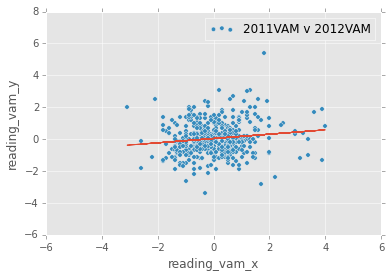

In [9]:
# different way, assign x and y
x = result['reading_vam_x']
y = result['reading_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam_x', y='reading_vam_y',label="2011VAM v 2012VAM")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     67.16
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.52e-15
Time:                        21:47:36   Log-Likelihood:                -641.72
No. Observations:                 461   AIC:                             1287.
Df Residuals:                     459   BIC:                             1296.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0229      0.046     -0.504      0.614        -0.112     0.066
x              0.3536      0.043      8.195      0.000         0.269     0.438
==============================================================================
Omnibus:                      111.557   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.454
Skew:                           0.851   Prob(JB):                    2.01e-165
Kurtosis:                       9.049   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

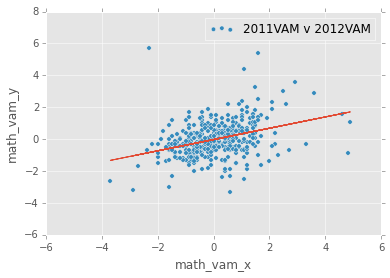

In [10]:
# different way, assign x and y
x = result['math_vam_x']
y = result['math_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam_x', y='math_vam_y',label="2011VAM v 2012VAM")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()